In [339]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [305]:
respostas = pickle.load(open('A42921_Ficha3_Respostas.p','rb'))
respostas

{'Q001': array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]]),
 'nome': 'Fábio Alexandre Cruz Silva Dias',
 'numero': 'A42921'}

In [306]:
D = pickle.load(open('MNISTsmall.p','rb'))

## Exercicio 1

In [386]:
D.keys()
X = D['X']
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1]
y1 = y[f1]

X2 = X[:, f2]
y2 = y[f2]

In [434]:
#Todos os digitos 0
X2a = X2[:, y2==0]

#Primeiros 381 exemplos
X2b = X2a[:, : 381]

### a)

R: Vou assumir que é 6.

iv (3)

In [435]:
digito = X2b[: 172]

Cx = np.cov(digito) * 1.0
u, V = la.eig(Cx)

u = u.real
V = V.real

idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

un = u / np.sum(u)
uc = np.cumsum(un)
W = V[:, : np.sum(uc <= 0.75)]

digitoP = np.dot(W.T, digito)
digitoR = np.dot(W, digitoP)

erroQuadratico = (np.mean(np.abs(digito - digitoR)))

print(erroQuadratico)

5.351179864328478


In [436]:
#Tentativa 2
m = np.mean(X2b, axis=1)[:, np.newaxis]
Xn = X2b-m

C = np.cov(X2b)
V, W = np.linalg.eig(C)
v = V.real

vn = v / np.sum(v)
L = np.cumsum(vn)

W2 = W[:,:np.sum(L<=.75)] 

Xp = np.dot(W.T, Xn) # dados transformardos

Xr = np.dot(W, Xp)+m # reconstrução dos dados

digito = X2b[:, 172]

print(np.round(np.mean(np.abs(digito - Xr.T))))

39.0


In [437]:
#Tentativa 3
digito = X2b[:, 172]

C3 = np.cov(X2b)
u,V = np.linalg.eig(C3)
u = np.real(u)
V = np.real(V)
idx = np.argsort(-u)

u = u[idx]
V = V[:,idx]

u = u/np.sum(u)
L = np.cumsum(u)

soma = np.sum(L <= 0.75)

W = V[:,:soma]
x = X2b

Xn = X2b
Y = np.dot(W.T,Xn)

Xr = np.dot(W,Y)
print(np.mean(np.abs(digito-Xr[:,197])))

46.43611679619572


### b)

R: iv (3)

#### i)

In [408]:
variar = np.sum(np.round(X2b, 2), axis=1)
variarNum = variar == 0

print(np.sum(variarNum))

resposta2 = np.sum(np.diag(Cx)==0)
print(resposta2)

310
119


#### ii)

In [410]:
print(np.corrcoef(X2b[411, :], X2b[217, :])[0, 1])

print(np.round(np.corrcoef(X2b)[411, 217], 2))

-0.13447254923122015
-0.13


C:\Users\fabio\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\fabio\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


### c)

R: iv (3)

#### i)

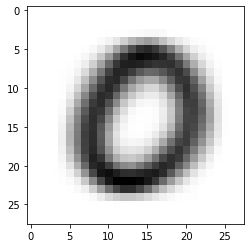

In [347]:
plt.imshow(la.pinv(X2b)[2, :].reshape(28, 28), cmap='binary')

#### ii)

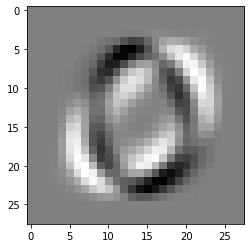

In [348]:
C = np.cov(X2b)
u, V = la.eig(C)

u = u.real
V = V.real

idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

segundo = V[:, 1]

plt.imshow(segundo.reshape(28, 28), cmap='binary')

### d)

#### i)

In [354]:
digito = X2b[:, 177]
pca = PCA(n_components=13).fit(X2b)
X2bp = pca.transform(X2b)

print(X2b.shape)
print(X2bp.shape)

X2br = pca.inverse_transform(X2bp)

print(X2br.shape)

EQM = np.round(np.mean(np.sum((digito - X2br[:, 177]) ** 2)))
print(EQM)

(784, 381)
(784, 13)
(784, 381)
571377.0


In [412]:
digito = X2b[: 177]

Cx = np.cov(digito) * 1.0
u, V = la.eig(Cx)

u = u.real
V = V.real

idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

W = V[:, : 13]

digitoP = np.dot(W.T, digito)
digitoR = np.dot(W, digitoP)

erroQuadratico = np.round(mean_squared_error(digito, digitoR))

print(erroQuadratico)

76.0


### e)

R: i (0)

#### i)

In [232]:
np.cov(X2b).shape

(784, 784)

#### ii)

In [414]:
v, W = la.eig(np.cov(X2b))

v = v.real
W = W.real

# Calcule o determinante
determinante = np.prod(W)

print(determinante)

-0.0


In [418]:
np.linalg.det(Cx)

0.0

### f)

R: ii) 49. (1)

In [420]:
pca = PCA(n_components=0.90).fit(X2b)
X2bp = pca.transform(X2b)

print(pca.components_.shape) #27. A resposta é 35?

(28, 381)


In [419]:
Cx = np.cov(X2b) * 1.0
u, V = la.eig(Cx)

u = u.real
V = V.real

idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

un = u / np.sum(u)
uc = np.cumsum(un)
W = V[:, : np.sum(uc <= 0.90) + 1]

print(W.shape[1])

49


In [423]:
pca = PCA(n_components=0.90, svd_solver='full').fit(X2b.T)
print(pca.n_components_)

49


### g)

R: ii) 310 (1)

In [421]:
pixels_valor_zero = np.sum(X2b == 0, axis=1)
num_pixeis_valor_zero = np.sum(pixels_valor_zero == X2b.shape[1])

print(num_pixeis_valor_zero)

310


In [424]:
np.sum(np.diag(Cx)==0)

310

### h)

R: i (0)

#### i)

In [358]:
vetorMedia = np.mean(X2b, axis=1)
np.round(la.norm(vetorMedia))

1917.0

#### ii)

In [362]:
np.std(X2b[157, :])

104.11835454763944

### i)

R iv (3)

In [426]:
cov = np.cov(X2b)

autovalores = np.linalg.eigvals(cov)

# Conte os autovalores superiores a 10^-10
autovalores_superiores = np.sum(autovalores > 10e-10)

print(autovalores_superiores)

380


In [427]:
np.sum(u > 10e-10)

380

### j)

In [411]:
x1 = X2b[:, 224]
x2 = X2b[:, 225]
x3 = X2b[:, 273]
x4 = X2b[:, 291]

#### i)

In [366]:
np.dot(x1, x2)

192

#### ii)

In [367]:
np.dot(x3, x4)

55

# Preenchimento das Respostas

In [281]:
q001 = respostas['Q001']

In [442]:
q001[:, :] = 0

#q001[0, 0] = 1 #a i
q001[1, 3] = 1 #b iv
q001[2, 3] = 1 #c iv
#q001[3, 0] = 1 #d i
q001[4, 0] = 1 #e i
q001[5, 1] = 1 #f ii
q001[6, 1] = 1 #g ii
q001[7, 0] = 1 #h i
q001[8, 3] = 1 #i iv
q001[9, 3] = 1 #j iv

q001

array([[0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [443]:
pickle.dump(respostas,open('A42921_Ficha3_Respostas.p','wb'))

In [444]:
pickle.load(open('A42921_Ficha3_Respostas.p','rb'))

{'Q001': array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]]),
 'nome': 'Fábio Alexandre Cruz Silva Dias',
 'numero': 'A42921'}